In [1]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Scientific computing and numerical operations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Advanced data visualization
import lightgbm as lgb
from scipy.stats import randint, uniform

# Machine learning libraries
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.linear_model import LogisticRegression  # A common classification algorithm
from sklearn.metrics import accuracy_score,recall_score, classification_report , f1_score # Model evaluation metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix  # Confusion matrix for classification results
from sklearn.utils.class_weight import compute_sample_weight
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

# Deep learning libraries (uncomment as needed)
# import tensorflow as tf
# import torch

<h2>Data import and visualization</h2>

In [2]:
train_df = pd.read_csv('Project_data/Project_Data_EE4C12_CE_ARR/ECG_data/train_data.csv')
print(train_df.shape)
test_df = pd.read_csv('Project_data/Project_Data_EE4C12_CE_ARR/ECG_data/test_data.csv')
val_df = pd.read_csv('Project_data/Project_Data_EE4C12_CE_ARR/ECG_data/val_data.csv')
# Display the first 5 rows of the DataFrame to confirm it loaded correctly
column_list = []
for i in range(train_df.shape[1]):
    column_list.append(str(i))
train_df.columns = column_list
test_df.columns = column_list
val_df.columns = column_list
print(column_list)
# print(test_df.shape)
#print(train_df)
# print(val_df.shape)
# print(val_df.columns)

(65669, 251)
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156

Each row is a single beat

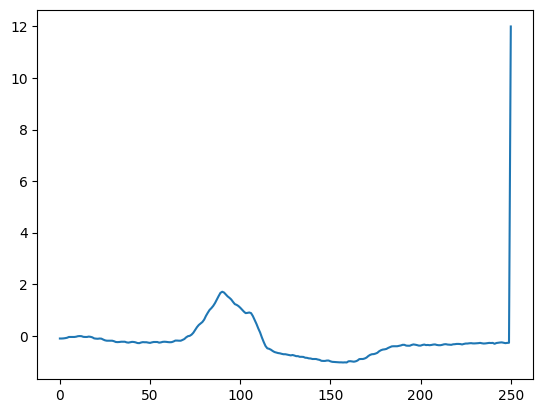

In [63]:
x = np.arange(0,251,1)
y = train_df.iloc[0]

plt.plot(x,y)
plt.show()

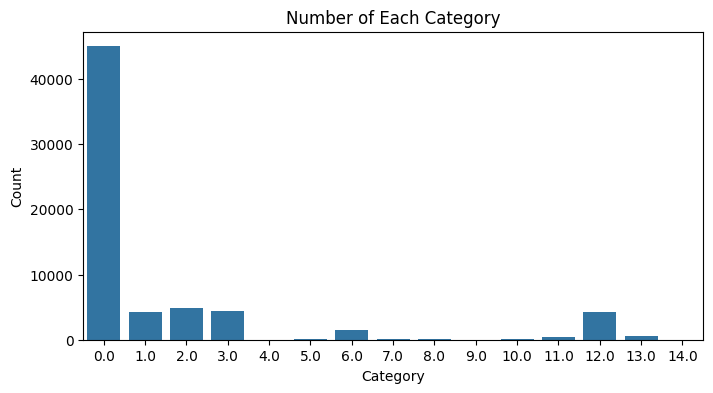

250
0.0     45011
2.0      4843
3.0      4353
12.0     4277
1.0      4215
6.0      1528
13.0      589
11.0      481
5.0       137
7.0        90
10.0       64
8.0        49
14.0       20
4.0        10
9.0         2
Name: count, dtype: int64


In [64]:
categories = train_df.iloc[:,-1].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=categories.index, y=categories.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Each Category')
plt.show()
print(categories)

<h2>Data pre-processing</h2>

Data is normalized with a std normalization as it is more robust to outliers than min-max

In [3]:
x_train_raw=  train_df.drop('250',axis = 1)

scaler = StandardScaler().fit(x_train_raw)
x_train = scaler.transform(x_train_raw)

y_train_raw = train_df['250']

x_val_raw = val_df.drop('250',axis = 1)
x_val_raw = scaler.transform(x_val_raw)

y_val_raw = val_df['250']

x_test_raw = test_df.drop('250',axis = 1)
x_test_raw = scaler.transform(x_test_raw)

y_test_raw = test_df['250']

Transforming output cathegories with one-hot encoding in order to avoid ordinal relationship bias

In [4]:
lb = LabelBinarizer()
lb.fit(y_train_raw)

y_train = lb.transform(y_train_raw)
y_val = lb.transform(y_val_raw)
y_test = lb.transform(y_test_raw)

The following parts include both the explorative initial research for new models and the optimization.

<h1>MLP models</h1>

<h2>Simple MLP Classifier</h2>

In [8]:
# we can see that the dataset is imbalanced, with some categories having significantly more samples than others.
#lets create simple Deeplearning model using skicitlearn to classify the ECG signals into their respective categories.

mlp = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', max_iter=30, random_state=42)
mlp.fit(x_train, y_train)

C:\Users\giore\anaconda3\envs\codeLab\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(10, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,30
,shuffle,True
,random_state,42


In [9]:
y_pred_val = mlp.predict(x_val_raw)
y_pred_test = mlp.predict(x_test_raw)

In [10]:
# Convert one-hot encoded validation labels and predictions back to single-column format
y_val_single = np.argmax(y_val, axis=1)
y_pred_val_single = np.argmax(y_pred_val, axis=1)
y_test_single = np.argmax(y_test, axis=1)
y_pred_test_single = np.argmax(y_pred_test, axis=1)

--- Validation Metrics ---
Accuracy score: 0.9447236180904522
Recall score: 0.3735479551312585
F1 score: 0.38370579831372675


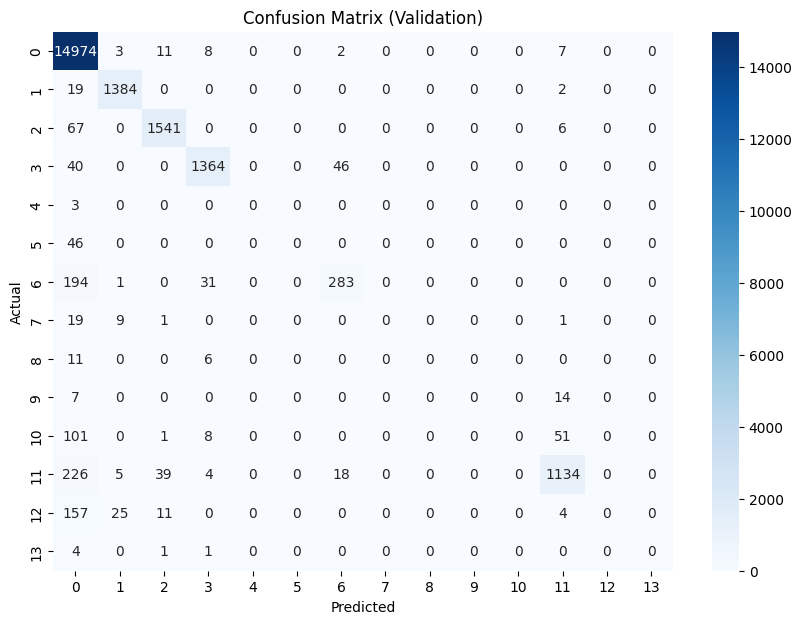

In [11]:
#confusion matrix validation
print("--- Validation Metrics ---")
print("Accuracy score:", accuracy_score(y_val_single, y_pred_val_single))
print("Recall score:", recall_score(y_val_single, y_pred_val_single, average='macro'))# macro is used bc it gives the same importance for classes with less samples
print("F1 score:", f1_score(y_val_single, y_pred_val_single, average='macro'))


conf = confusion_matrix(y_val_single, y_pred_val_single)
plt.figure(figsize=(10,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

The simple MLP classifier underfits the problem, the accuracy is high just because it predicts most samples to be in the group with the biggest number of samples. The recall instead, when averaged for different classes, is very low.

<h2>MLP Classifier with weighted samples</h2>

In [12]:
%pip install --upgrade scikit-learn
%pip install imbalanced-learn
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Convert y_train from one-hot if needed (already one-hot, so use as is)
# If y_train was not one-hot: y_train = to_categorical(y_train_raw)

# Build a simple MLP model
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Compute class weights for imbalanced data

classes = np.unique(y_train_raw)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_raw)
class_weight_dict = dict(zip(classes.astype(int), class_weights))

# Fit the model
model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=32,
    class_weight=class_weight_dict,
    validation_data=(x_val_raw, y_val),
    verbose=1
)

Epoch 1/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2603 - loss: 2.3793 - val_accuracy: 0.2653 - val_loss: 2.2941
Epoch 2/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3211 - loss: 1.9892 - val_accuracy: 0.4499 - val_loss: 2.0695
Epoch 3/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2804 - loss: 1.8189 - val_accuracy: 0.2950 - val_loss: 2.0200
Epoch 4/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3189 - loss: 1.6645 - val_accuracy: 0.3644 - val_loss: 1.8331
Epoch 5/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3442 - loss: 1.5042 - val_accuracy: 0.3559 - val_loss: 1.8017
Epoch 6/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3414 - loss: 1.4184 - val_accuracy: 0.3390 - val_loss: 1.8435
Epoch 7/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3276 - loss: 1.3469 - val_accuracy: 0.3269 - val_loss: 1.8568
Epoch 8/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3316 - loss: 1.2803 - 

In [14]:
y_pred_val_weight = model.predict(x_val_raw)
y_pred_test_weight = model.predict(x_test_raw)

y_pred_val_single = np.argmax(y_pred_val_weight, axis=1)
y_pred_test_single = np.argmax(y_pred_test_weight, axis=1)

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step


Accuracy score: 0.3559616263133851
Recall score: 0.6789895406222151
F1 score: 0.29886177003726294


C:\Users\giore\anaconda3\envs\codeLab\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


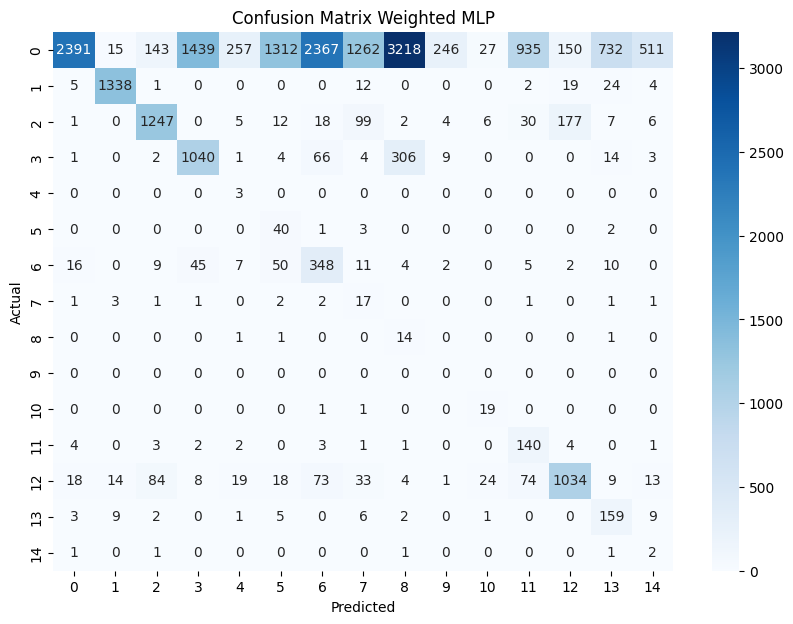

In [15]:
#confusion matrix validation
print("Accuracy score:", accuracy_score(y_val_single, y_pred_val_single))
print("Recall score:", recall_score(y_val_single, y_pred_val_single, average='macro')) # macro is used bc it gives the same importance for classes with less samples
print("F1 score:", f1_score(y_val_single, y_pred_val_single, average='macro'))
conf = confusion_matrix(y_val_single, y_pred_val_single)
plt.figure(figsize=(10,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Weighted MLP')
plt.show()

Now the accuracy is down, but the recall slightly improved. F1-score decreased 

<h1>MLP Classifier applying SMOTE</h1>

<h2>Exploration</h2>

SMOTE can be used to oversample rare classes

In [16]:
smote = SMOTE(random_state=42, k_neighbors=1)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [17]:
mlp_SMOTE = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', max_iter=30, random_state=42)
mlp_SMOTE.fit(x_train_resampled, y_train_resampled)

C:\Users\giore\anaconda3\envs\codeLab\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(10, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,30
,shuffle,True
,random_state,42


In [18]:
y_pred_val_SMOTE = mlp_SMOTE.predict(x_val_raw)
y_pred_test_SMOTE = mlp_SMOTE.predict(x_test_raw)

In [19]:
y_pred_val_single_SMOTE = np.argmax(y_pred_val_SMOTE, axis=1)
y_pred_test_single_SMOTE = np.argmax(y_pred_test_SMOTE, axis=1)

C:\Users\giore\anaconda3\envs\codeLab\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Accuracy score: 0.8117862037460027
Recall score: 0.6212836775813536
F1 score: 0.4519215475531173


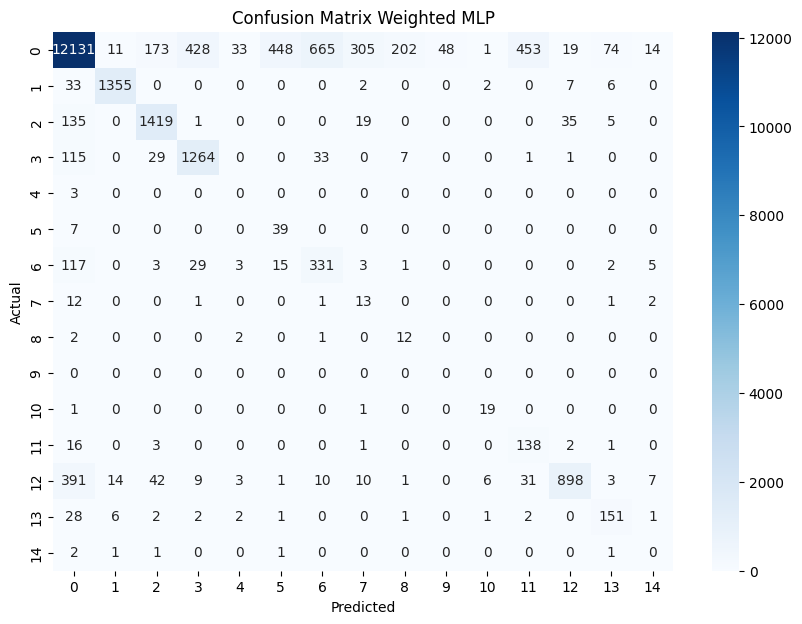

In [20]:
#confusion matrix validation
print("Accuracy score:", accuracy_score(y_val_single, y_pred_val_single_SMOTE))
print("Recall score:", recall_score(y_val_single, y_pred_val_single_SMOTE, average='macro')) # macro is used bc it gives the same importance for classes with less samples
print("F1 score:", f1_score(y_val_single, y_pred_val_single_SMOTE, average='macro'))
conf = confusion_matrix(y_val_single, y_pred_val_single_SMOTE)
plt.figure(figsize=(10,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Weighted MLP')
plt.show()


The model now has better accuracy and recall than in the simple case and weighted case

<h2>Optimization</h2>

<h2>MLP Classifier with randomized search of hidden layer dimension, using SMOTE</h2>

In [20]:
pipeline = Pipeline([
    ('smote', SMOTE(k_neighbors=1, random_state=42)),
    ('mlp', MLPClassifier(max_iter=30, random_state=42, early_stopping=True)) # Added early stopping
])

In [21]:
# Less demanding random search setup
param_dist = {
    'mlp__hidden_layer_sizes': [
        (32,),                # Single hidden layer
        (64, 32),             # Two hidden layers
    ],
    'mlp__activation': ['relu'],
    'mlp__alpha': [0.0001, 0.001],
    'mlp__learning_rate_init': [0.001]
}



In [22]:
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=5,  # Number of parameter settings that are sampled.
    cv=3,       # 3-fold cross-validation.
    scoring='f1_macro',
    n_jobs=-1,  # Use all available cores.
    random_state=42,
    verbose=1   # Shows progress
)

In [23]:

print("Starting hyperparameter tuning...")
# The search is performed on your original training data.
# The pipeline handles the SMOTE application internally.
random_search.fit(x_train, y_train)

Starting hyperparameter tuning...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\giore\anaconda3\envs\codeLab\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


OSError: [WinError 1450] Insufficient system resources exist to complete the requested service

In [ ]:
# --- Step 4: Display the Best Results ---
print("\n------------------------------------")
print("Randomized Search Complete!")
print("Best F1 macro score found: {:.4f}".format(random_search.best_score_))
print("Best parameters found:")
print(random_search.best_params_)

<h1> Downsampled MLP</h1>

<h2>Exploration</h2>

In [5]:
# Downsample "no disease" (label 0.0) to 10% of its original count
no_disease_mask = y_train_raw == 0.0
disease_mask = ~no_disease_mask

# Indices for each group
no_disease_indices = y_train_raw[no_disease_mask].index
disease_indices = y_train_raw[disease_mask].index

# Randomly sample 10% of "no disease"
np.random.seed(42)
no_disease_sample = np.random.choice(no_disease_indices, size=int(0.01 * len(no_disease_indices)), replace=False)

# Combine with all disease indices
selected_indices = np.concatenate([no_disease_sample, disease_indices])

# Subset the data
x_train_reduced = x_train[selected_indices]
y_train_reduced = y_train[selected_indices]

print("Original x_train shape:", x_train.shape)
print("Reduced x_train shape:", x_train_reduced.shape)


Original x_train shape: (65669, 250)
Reduced x_train shape: (21108, 250)


In [6]:
smote = SMOTE(random_state=42, k_neighbors=1)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_reduced, y_train_reduced)

c:\Users\azati\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\azati\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\azati\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\azati\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

In [23]:
mlp_SMOTE = MLPClassifier(hidden_layer_sizes=(20, 10), activation='relu', max_iter=50, random_state=42)
mlp_SMOTE.fit(x_train_resampled, y_train_resampled)

C:\Users\giore\anaconda3\envs\codeLab\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(20, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,50
,shuffle,True
,random_state,42


In [24]:
y_pred_val_SMOTE = mlp_SMOTE.predict(x_val_raw)
y_pred_test_SMOTE = mlp_SMOTE.predict(x_test_raw)

In [25]:
y_pred_val_single_SMOTE = np.argmax(y_pred_val_SMOTE, axis=1)
y_pred_test_single_SMOTE = np.argmax(y_pred_test_SMOTE, axis=1)

C:\Users\giore\anaconda3\envs\codeLab\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Accuracy score: 0.8980813156692554
Recall score: 0.762539013644851
F1 score: 0.523127468016944


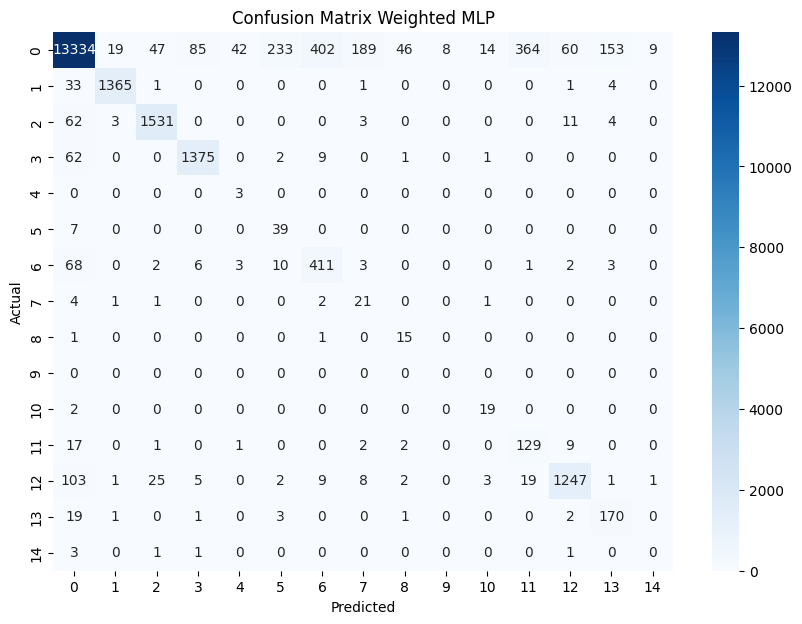

In [26]:
#confusion matrix validation
print("Accuracy score:", accuracy_score(y_val_single, y_pred_val_single_SMOTE))
print("Recall score:", recall_score(y_val_single, y_pred_val_single_SMOTE, average='macro')) # macro is used bc it gives the same importance for classes with less samples
print("F1 score:", f1_score(y_val_single, y_pred_val_single_SMOTE, average='macro'))
conf = confusion_matrix(y_val_single, y_pred_val_single_SMOTE)
plt.figure(figsize=(10,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Weighted MLP')
plt.show()


<h2>Optimization</h2>

In [11]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Define the pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('mlp', MLPClassifier(max_iter=100, random_state=42))
])

# Define a parameter grid for randomized search
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__solver': ['adam', 'sgd'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate_init': [0.001, 0.01]
}

# Set n_iter to fit your time budget
n_iter = 5  # Adjust as needed

# Set up RandomizedSearchCV; use f1_macro for multiclass
rand_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=n_iter,
    scoring='f1_macro',  # multiclass-safe metric
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# IMPORTANT:
# Your stored y_train_resampled is a one-hot / multilabel-indicator array.
# RandomizedSearchCV and the pipeline's SMOTE expect 1D label vectors (not one-hot).
# Convert the training labels back to single integer labels before fitting.
y_train_resampled_single = np.argmax(y_train_resampled, axis=1)

# Fit to your data (with single-label targets)
rand_search.fit(x_train_resampled, y_train_resampled_single)

# Print best parameters and score
print("Best parameters found:", rand_search.best_params_)
print("Best F1 (macro) score:", rand_search.best_score_)

# Predict and evaluate
y_pred = rand_search.predict(x_test_raw)

# Ensure ground-truth test labels are 1D integer labels
y_test_single = y_test_raw.astype(int).to_numpy()

print(classification_report(y_test_single, y_pred))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\azati\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters found: {'mlp__solver': 'adam', 'mlp__learning_rate_init': 0.001, 'mlp__hidden_layer_sizes': (50,), 'mlp__alpha': 0.01, 'mlp__activation': 'tanh'}
Best F1 (macro) score: 0.9904898827346189
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     15004
           1       0.97      0.99      0.98      1405
           2       0.93      0.99      0.96      1615
           3       0.92      0.98      0.95      1451
           4       0.03      0.33      0.05         3
           5       0.11      0.87      0.20        46
           6       0.34      0.92      0.49       509
           7       0.12      0.87      0.21        30
           8       0.13      0.76      0.23        17
           9       0.00      0.00      0.00         0
          10       0.58      0.90      0.70        21
          11       0.19      0.87      0.31       160
          12       0.73      0.96      0.83      1426
          13       0.46      0.95      

c:\Users\azati\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\azati\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\azati\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<h1>Forest search </h1>

<h2>Exploration</h2>

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score, f1_score, precision_score, confusion_matrix
clf = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
clf.fit(x_train_reduced, np.argmax(y_train_reduced, axis=1))

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
y_pred_val_forest = clf.predict(x_val_raw)
y_pred_test_forest = clf.predict(x_test_raw)

In [38]:
y_train_reduced

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(21108, 15))

Accuracy score: 0.7924623115577889
Recall score: 0.733502619790155
F1 score: 0.5697832387451094


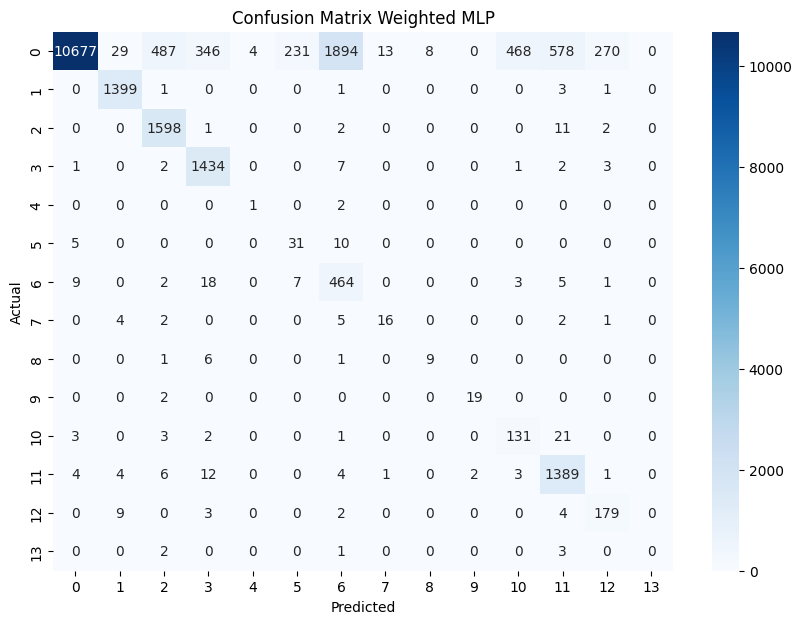

In [41]:
#confusion matrix validation
print("Accuracy score:", accuracy_score(y_val_single, y_pred_val_forest))
print("Recall score:", recall_score(y_val_single, y_pred_val_forest, average='macro')) # macro is used bc it gives the same importance for classes with less samples
print("F1 score:", f1_score(y_val_single, y_pred_val_forest, average='macro'))
conf = confusion_matrix(y_val_single, y_pred_val_forest)
plt.figure(figsize=(10,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Weighted MLP')
plt.show()


<h2>Optimization</h2>

<h1>Gradient boosting model</h1>

<h2>Exploration part</h2>

In [54]:
lgbm = lgb.LGBMClassifier(class_weight='balanced', random_state=42, n_estimators=150, n_jobs=1)

In [56]:
lgbm.fit(x_train, np.argmax(y_train,axis=1))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.088841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 63750
[LightGBM] [Info] Number of data points in the train set: 65669, number of used features: 250
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightG

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,150
,subsample_for_bin,200000
,objective,None
,class_weight,'balanced'
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [59]:
y_pred_val_lgbm = lgbm.predict(x_val_raw)

C:\Users\giore\anaconda3\envs\codeLab\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy score: 0.9818638647784377
Recall score: 0.6848682886764502
F1 score: 0.7204383050116753


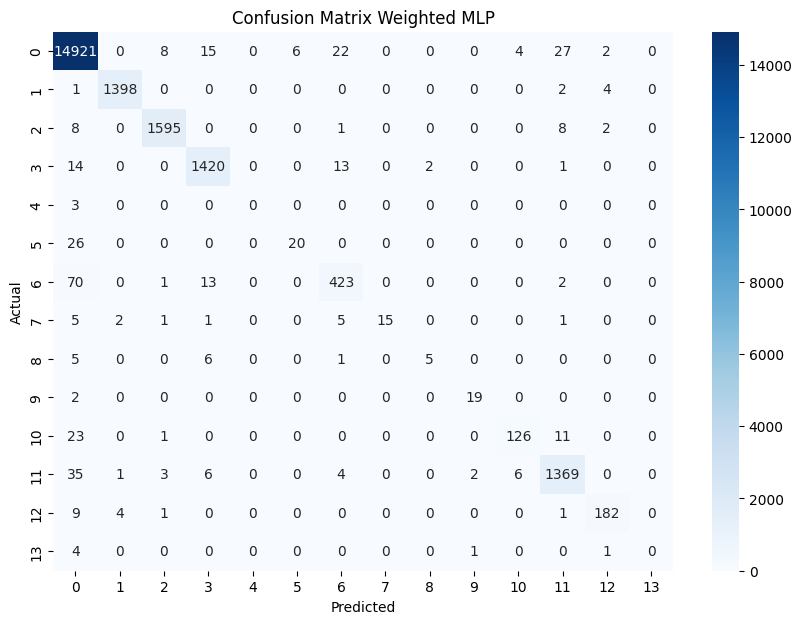

In [60]:
#confusion matrix validation
print("Accuracy score:", accuracy_score(y_val_single, y_pred_val_lgbm))
print("Recall score:", recall_score(y_val_single, y_pred_val_lgbm, average='macro')) # macro is used bc it gives the same importance for classes with less samples
print("F1 score:", f1_score(y_val_single, y_pred_val_lgbm, average='macro'))
conf = confusion_matrix(y_val_single, y_pred_val_lgbm)
plt.figure(figsize=(10,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Weighted MLP')
plt.show()


<h2>Optimization</h2>

In [70]:
param_dist = {
    'n_estimators': randint(100, 400),
    'learning_rate': uniform(0.01, 0.2),
    'num_leaves': randint(20, 50),
    'max_depth': [-1, 10, 20, 30],
    'reg_alpha': uniform(0.0, 1.0),
    'reg_lambda': uniform(0.0, 1.0)
}

In [71]:
# 3. Set up the Randomized Search
# n_iter=20 will try 20 different combinations.
# scoring='f1_macro' optimizes for the best F1 score.
random_search = RandomizedSearchCV(
    lgbm,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

In [72]:
random_search.fit(x_train, np.argmax(y_train,axis=1))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\giore\anaconda3\envs\codeLab\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 63750
[LightGBM] [Info] Number of data points in the train set: 65669, number of used features: 250
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightG

,estimator,LGBMClassifie...ndom_state=42)
,param_distributions,"{'learning_rate': <scipy.stats....0021905387820>, 'max_depth': [-1, 10, ...], 'n_estimators': <scipy.stats....002191BCED350>, 'num_leaves': <scipy.stats....0021905387490>, ...}"
,n_iter,20
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [73]:
print("\nOptimization complete!")
print(f"Best F1-macro score: {random_search.best_score_:.4f}")
print("Best parameters found:")
print(random_search.best_params_)


Optimization complete!
Best F1-macro score: 0.6779
Best parameters found:
{'learning_rate': np.float64(0.09916655057071823), 'max_depth': 20, 'n_estimators': 187, 'num_leaves': 40, 'reg_alpha': np.float64(0.6011150117432088), 'reg_lambda': np.float64(0.7080725777960455)}


In [77]:
lgbm_opt = lgb.LGBMClassifier(class_weight='balanced', random_state=42, n_estimators=187,learning_rate=0.09916655057071823,  max_depth=20, reg_alpha= 0.6011150117432088, reg_lambda=0.7080725777960455,n_jobs=1)

In [78]:
lgbm_opt.fit(x_train, np.argmax(y_train,axis=1))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094441 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 63750
[LightGBM] [Info] Number of data points in the train set: 65669, number of used features: 250
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightG

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,20
,learning_rate,0.09916655057071823
,n_estimators,187
,subsample_for_bin,200000
,objective,None
,class_weight,'balanced'
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [79]:
y_pred_val_lgbm_opt = lgbm_opt.predict(x_val_raw)

C:\Users\giore\anaconda3\envs\codeLab\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy score: 0.9795797167656464
Recall score: 0.7061385773851663
F1 score: 0.7246082182308162


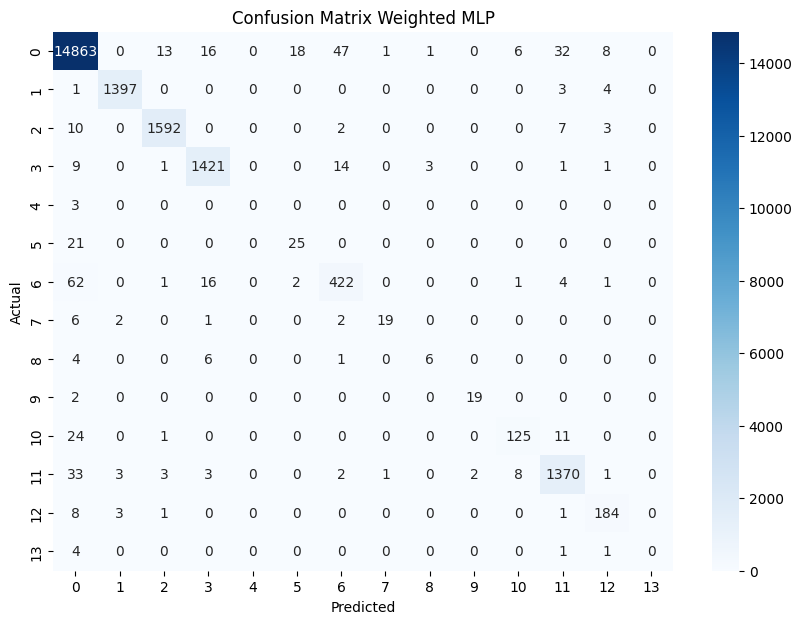

In [80]:
#confusion matrix validation
print("Accuracy score:", accuracy_score(y_val_single, y_pred_val_lgbm_opt))
print("Recall score:", recall_score(y_val_single, y_pred_val_lgbm_opt, average='macro')) # macro is used bc it gives the same importance for classes with less samples
print("F1 score:", f1_score(y_val_single, y_pred_val_lgbm_opt, average='macro'))
conf = confusion_matrix(y_val_single, y_pred_val_lgbm_opt)
plt.figure(figsize=(10,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Weighted MLP')
plt.show()


In [82]:
print(classification_report(y_val_single, y_pred_val_lgbm_opt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15005
           1       0.99      0.99      0.99      1405
           2       0.99      0.99      0.99      1614
           3       0.97      0.98      0.98      1450
           4       0.00      0.00      0.00         3
           5       0.56      0.54      0.55        46
           6       0.86      0.83      0.84       509
           7       0.90      0.63      0.75        30
           8       0.60      0.35      0.44        17
          10       0.90      0.90      0.90        21
          11       0.89      0.78      0.83       161
          12       0.96      0.96      0.96      1426
          13       0.91      0.93      0.92       197
          14       0.00      0.00      0.00         6

    accuracy                           0.98     21890
   macro avg       0.75      0.71      0.72     21890
weighted avg       0.98      0.98      0.98     21890



C:\Users\giore\anaconda3\envs\codeLab\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\giore\anaconda3\envs\codeLab\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\giore\anaconda3\envs\codeLab\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result

<h1>SVC models</h1>

<h2>SVC with RBF kernel</h2>

In [42]:
svm_rbf = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_rbf.fit(x_train,y_train_raw)   # SVC expects 1D array, not 1hot encoded ones

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [43]:
y_pred_val_svc = svm_rbf.predict(x_val_raw)
y_pred_test_svc = svm_rbf.predict(x_test_raw)

Accuracy score: 0.9196436729100046
Recall score: 0.8558463899424013
F1 score: 0.6178448865376097


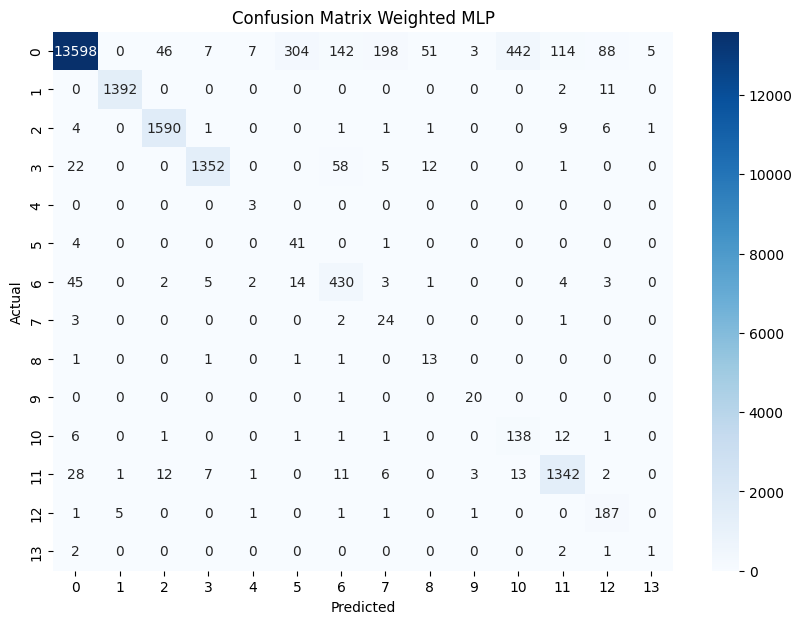

In [44]:
#confusion matrix validation
print("Accuracy score:", accuracy_score(y_val_single, y_pred_val_svc))
print("Recall score:", recall_score(y_val_single, y_pred_val_svc, average='macro')) # macro is used bc it gives the same importance for classes with less samples
print("F1 score:", f1_score(y_val_single, y_pred_val_svc, average='macro'))
conf = confusion_matrix(y_val_single, y_pred_val_svc)
plt.figure(figsize=(10,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Weighted MLP')
plt.show()

The model training and prediction time is extremely long, even though the metrics are good. 

A rbf model with deleted data of no disease to speed it up is trained below

In [45]:
svm_rbf = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_rbf.fit(x_train_reduced,np.argmax(y_train_reduced,axis=1))   # SVC expects 1D array, not 1hot encoded ones

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [46]:
y_pred_val_svc_red = svm_rbf.predict(x_val_raw)
y_pred_test_svc_red = svm_rbf.predict(x_test_raw)

Accuracy score: 0.8391502969392417
Recall score: 0.7958305378448908
F1 score: 0.49119106834548226


C:\Users\giore\anaconda3\envs\codeLab\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


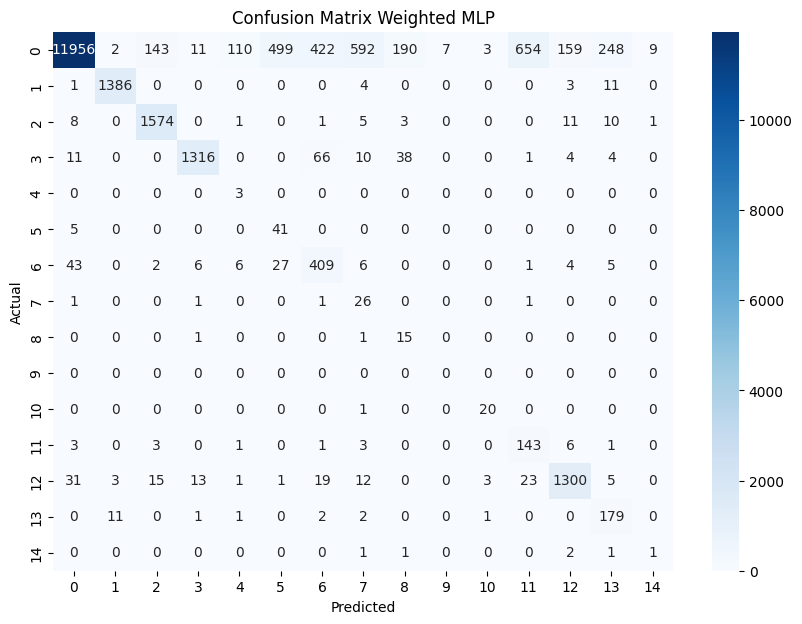

In [47]:
#confusion matrix validation
print("Accuracy score:", accuracy_score(y_val_single, y_pred_val_svc_red))
print("Recall score:", recall_score(y_val_single, y_pred_val_svc_red, average='macro')) # macro is used bc it gives the same importance for classes with less samples
print("F1 score:", f1_score(y_val_single, y_pred_val_svc_red, average='macro'))
conf = confusion_matrix(y_val_single, y_pred_val_svc_red)
plt.figure(figsize=(10,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Weighted MLP')
plt.show()

Accuracy and recall are down, but training time is not as long

<h2>SVC with linear kernel</h2>

failure to converge in a limited number of iterations

In [57]:
svm_linear = LinearSVC(class_weight='balanced', random_state=42, dual=False, max_iter=2000).fit(x_train_reduced,np.argmax(y_train_reduced,axis=1))

C:\Users\giore\anaconda3\envs\codeLab\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [58]:
y_pred_val_lin_svc = svm_linear.predict(x_val_raw)
y_pred_test_lin_svc = svm_linear.predict(x_test_raw)

C:\Users\giore\anaconda3\envs\codeLab\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Accuracy score: 0.5355870260392873
Recall score: 0.5935324383047877
F1 score: 0.3043743313534012


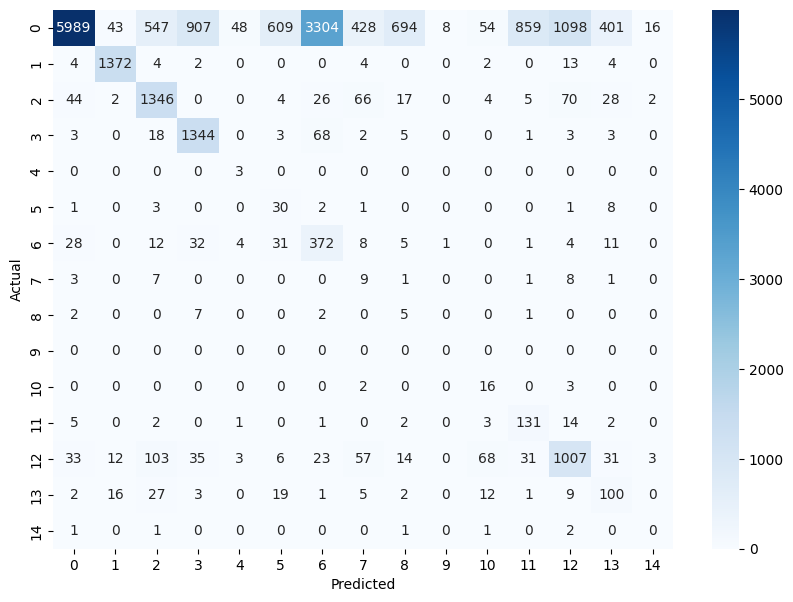

In [59]:
#confusion matrix validation
print("Accuracy score:", accuracy_score(y_val_single, y_pred_val_lin_svc))
print("Recall score:", recall_score(y_val_single, y_pred_val_lin_svc, average='macro')) # macro is used bc it gives the same importance for classes with less samples
print("F1 score:", f1_score(y_val_single, y_pred_val_lin_svc, average='macro'))
conf = confusion_matrix(y_val_single, y_pred_val_lin_svc)
plt.figure(figsize=(10,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

poly kernel on the dataset takes too long

<h1>Logistic Regression</h1>

In [48]:
lr_model = LogisticRegression(
    multi_class='multinomial', # Handles multiple classes
    class_weight='balanced',   # Adjusts for imbalanced data
    solver='saga',             # A good solver for large datasets
    max_iter=2000,             # Increased to ensure convergence
    random_state=42,
    n_jobs=-1                  # Use all available CPU cores
)

In [49]:
lr_model.fit(x_train_reduced, np.argmax(y_train_reduced, axis=1))

C:\Users\giore\anaconda3\envs\codeLab\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\giore\anaconda3\envs\codeLab\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'saga'
,max_iter,2000
,multi_class,'multinomial'


In [50]:
y_pred_val_lr = lr_model.predict(x_val_raw)
y_pred_test_lr = lr_model.predict(x_test_raw)

C:\Users\giore\anaconda3\envs\codeLab\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Accuracy score: 0.6847418912745545
Recall score: 0.6938915005771972
F1 score: 0.3514244937290202


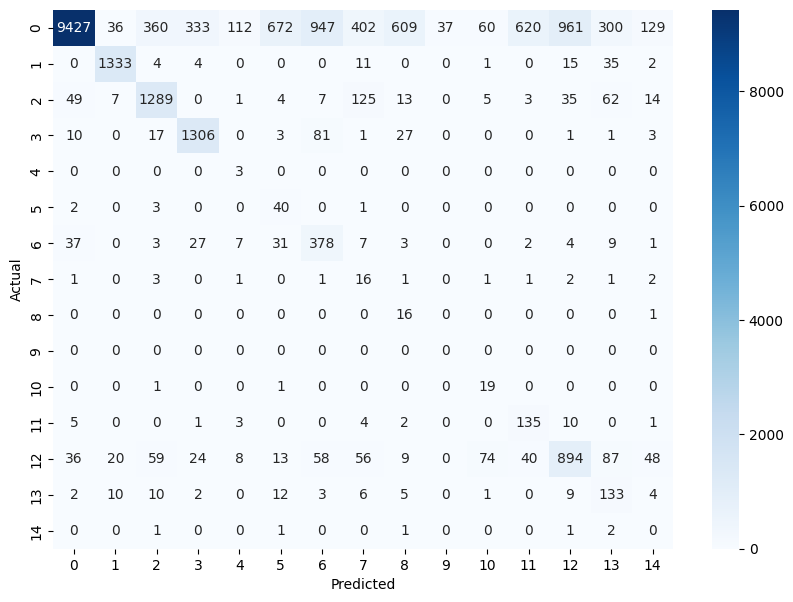

In [51]:
#confusion matrix validation
print("Accuracy score:", accuracy_score(y_val_single, y_pred_val_lr))
print("Recall score:", recall_score(y_val_single, y_pred_val_lr, average='macro')) # macro is used bc it gives the same importance for classes with less samples
print("F1 score:", f1_score(y_val_single, y_pred_val_lr, average='macro'))
conf = confusion_matrix(y_val_single, y_pred_val_lr)
plt.figure(figsize=(10,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()